**Author: Group 3 (Minghua Tu, Yichen Zhao, Haokun Li, Fangyuan Zhao)**

# Import Library

In [1]:
%matplotlib notebook
import pandas as pd
import autograd.numpy as np
from autograd import grad,elementwise_grad
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from itertools import zip_longest

## Type of Functions

In [2]:
#Ackley
a,b,c = 20, 0.2, 2*np.pi
ackley = lambda x,y: -a*np.exp(-b*np.sqrt(1/2*(x**2+y**2)))-np.exp(1/2*(np.cos(c*x)+np.cos(c*y)))+a+np.exp(1)

In [3]:
#Egg Holder
egg = lambda x,y: -(y + 47)*np.sin(np.sqrt(np.abs(y +(x/2)+47))) - x *np.sin(np.sqrt(np.abs(x-(y+47))))

In [4]:
#holder table
holder = lambda x,y: -abs(np.sin(x)*np.cos(y)*np.exp(abs(1-np.sqrt(x**2+y**2)/np.pi)))

In [5]:
d = 2
lol = lambda x, y: 10*d + x**2 - 10*np.cos(2*np.pi*x) + y**2 - 10*np.cos(2*np.pi*y)

## Partial Derivative using Autograd

In [6]:
def PDA(fuc, x, y):
    '''
    AutoGrad compute partial Derivative
    
    Parameters
    ----------
    
    fuc : loss function
    x : initial x value as float
    y : initial y value as float
    
    Returns
    -------
    
    dxx : Partial derivative respect to x
    dyy : Partial derivative respect to y
    '''
    dxx = elementwise_grad(fuc, 0)(x,y)
    dyy = elementwise_grad(fuc, 1)(x,y)
    
    return dxx, dyy

## Plain Vanilla

In [7]:
def PlainV(fuc, x_init, y_init, n_iter, eta, tol):  
    '''
    Plain vanilla gradient descent that attempts to find the global minima by descending down each gradient.
    Note the learning rate, small learning rates means reaching the minima by small steps which can take longer time, 
    while a large learning rate (step size) could cause us to miss the minima and bounce around.
    
    Parameters
    ----------
    
    fuc: Loss function with 2 variables
    
    x_init: Start point at coordinate x as float
    
    y_init: Start point at coordinate y as float
    
    n_iter: Number of iteration as interger
    
    eta: Learning Rate given as float, size of learning rate affects each correction/step taken in descent
    
    tol: Tolerance rate to end descent, by default should be set at a zero equivalent
    
    
    Return
    ------
    
    x_path: Path of x taken to map the route of gradient descent.  
    y_path: Path of y taken to map the route of gradient descent. 
    loss_path: loss function for each x and y path.
    
    '''
    x = x_init
    y = y_init 
    loss = fuc(x,y)

    x_path = []
    y_path = []
    loss_path = []

    x_path.append(x)
    y_path.append(y)
    loss_path.append(loss)

    dx, dy = PDA(fuc, x, y)

    for i in range(n_iter):
        if np.abs(dx) < tol or np.abs(dy) < tol or np.isnan(dx) or np.isnan(dy): # both gradient for x and y must be smaller than tol for it to stop
            break
        dx, dy = PDA(fuc,x,y)

        x += (-eta) * dx
        y += (-eta) * dy

        x_path.append(x)
        y_path.append(y)

        loss = fuc(x,y)
        loss_path.append(loss)

    if np.isnan(dx) or np.isnan(dy):
        print('\033[1mPlain Vanilla \033[0mExploded')
    elif np.abs(dx) < tol and np.abs(dy) < tol:
        print('\033[1mPlain Vanilla \033[0mConverged in {} steps. \ncoordinates of x and y at ({:f},{:f}) \nloss function of {} \nStep size is {}'.format(i,x,y,loss,eta))
    else:
        print('\033[1mPlain Vanilla \033[0mConverged in {} steps. \ncoordinates of x and y at ({:f},{:f}) \nloss function of {} \nStep size is {}'.format(i,x,y,loss,eta))
    return x_path, y_path, loss_path


## Get Ready to Plot plain vanilla

<IPython.core.display.Javascript object>


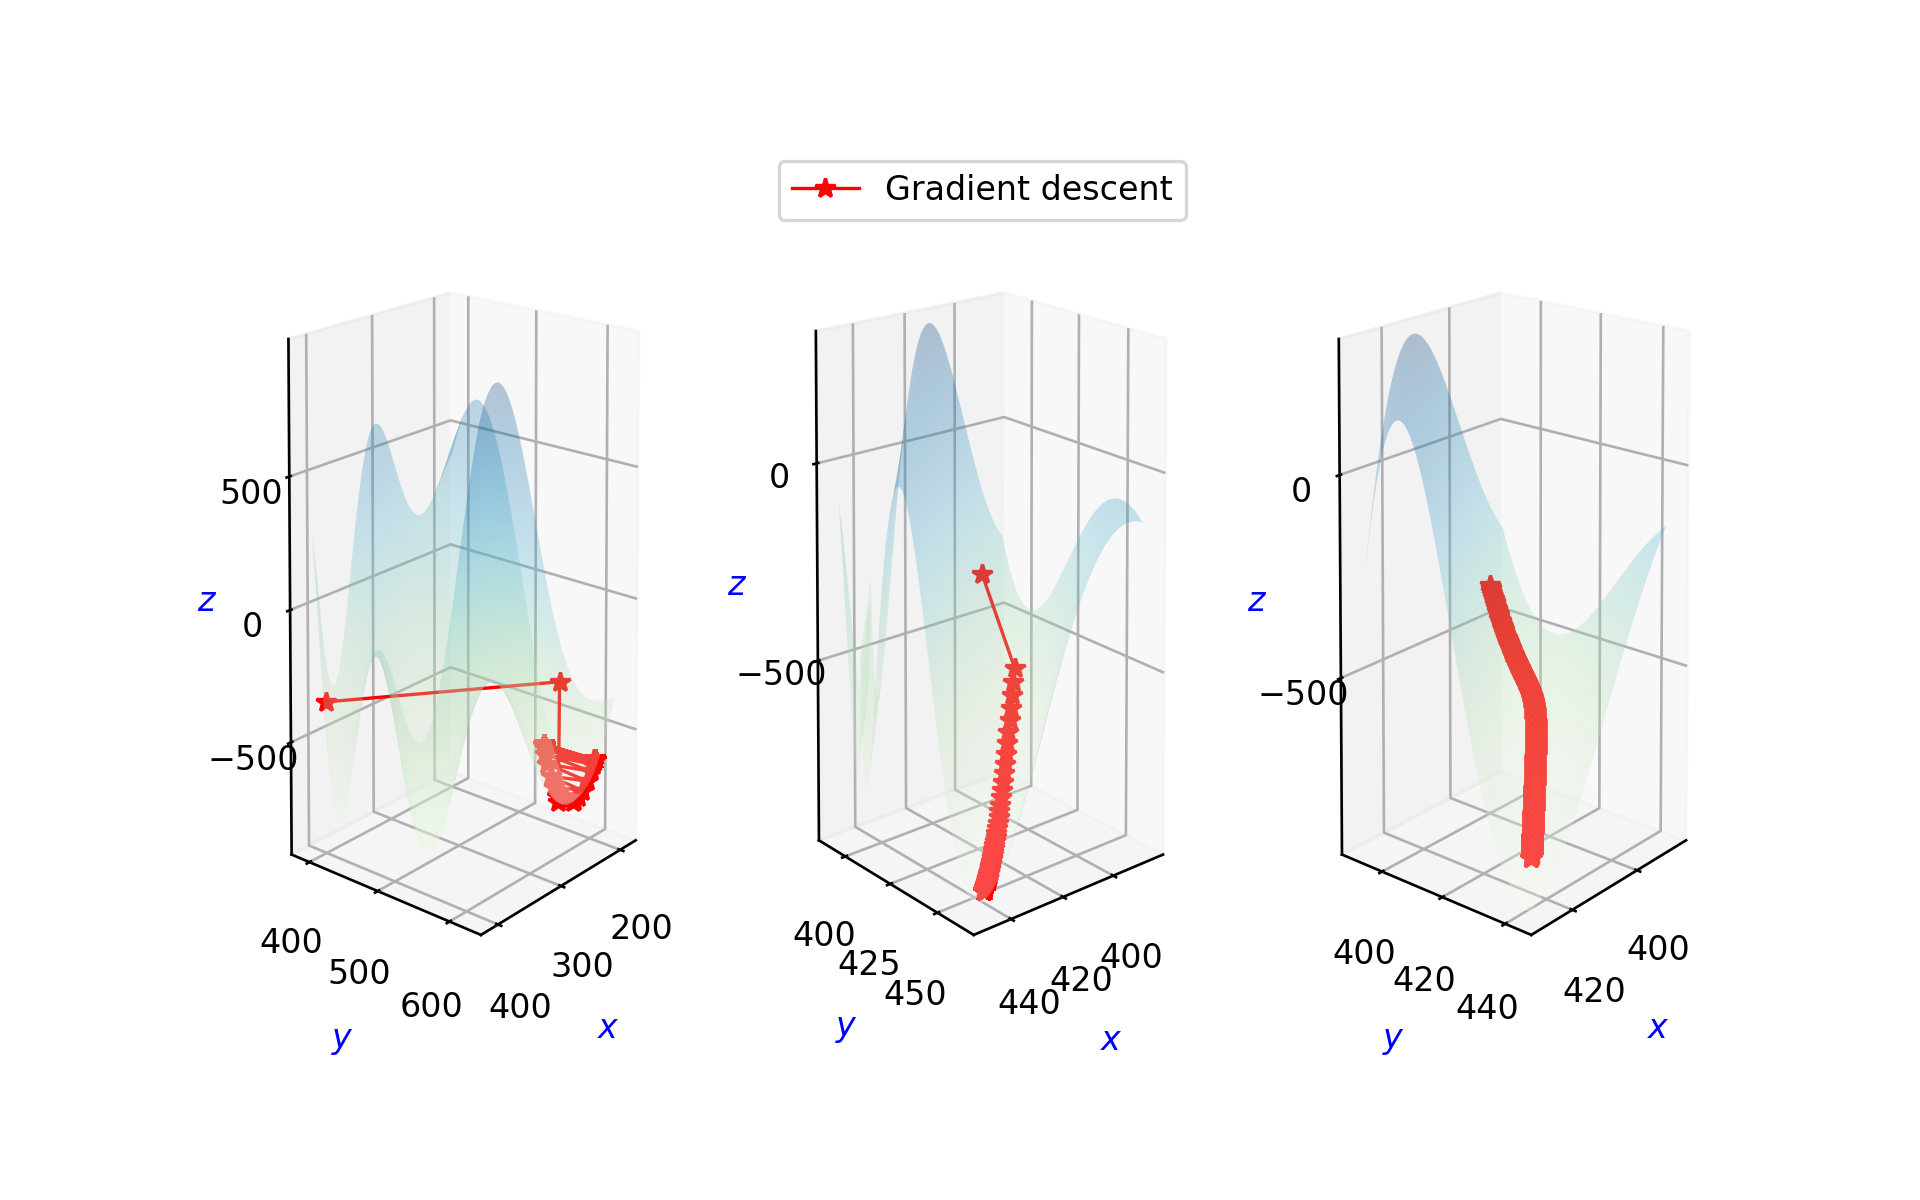

Plain Vanilla Converged in 999 steps. 
coordinates of x and y at (200.885876,536.181438) 
loss function of -624.7776411613172 
Step size is 6.5
Plain Vanilla Converged in 231 steps. 
coordinates of x and y at (439.480949,453.977388) 
loss function of -935.3379515601373 
Step size is 0.3
Plain Vanilla Converged in 999 steps. 
coordinates of x and y at (419.406432,434.645104) 
loss function of -860.8673023232659 
Step size is 0.005


In [8]:
############Put Function here for easy plotting#####
PlainV_plot_fuc = egg

eta1,eta2,eta3 = 6.5, 0.3, 0.005          #the learning rate for each plot below
setx,sety = 400.1,400.1                  #initial value for x and y (must be float)
axiss = 10                              #change this for the meshgrid

####################################################
#open figure
fig = plt.figure(figsize=(8,5), dpi=120)

xpath,ypath,loss_path = PlainV(fuc = PlainV_plot_fuc, x_init = setx, y_init = sety, n_iter = 1000, eta = eta1, tol = 1e-5)#xxxxxx

xypath = np.vstack((xpath,ypath))

xmin, xmax, xstep = min(xpath), max(xpath), 1
ymin, ymax, ystep = min(ypath), max(ypath), 1

xrange = np.arange(xmin - axiss, xmax+axiss, xstep)
yrange = np.arange(ymin - axiss, ymax+axiss, ystep)

x, y = np.meshgrid(xrange,yrange)
loss_fuc = PlainV_plot_fuc(x,y)

#Start plotting
ax = fig.add_subplot(1, 3, 1, projection='3d', elev=10, azim=40)
ax.plot_surface(x,y,loss_fuc,rstride=1, cstride=1, edgecolor='none', alpha=.3, cmap=plt.cm.GnBu)
ax.plot(xpath,ypath,loss_path, marker = '*', color = 'r', alpha = 1, label = 'Gradient descent',linewidth=1)

ax.set_xlabel('$x$', fontsize = 10,color = 'blue')
ax.set_ylabel('$y$', fontsize = 10,color = 'blue')
ax.set_zlabel('$z$', fontsize = 10,color = 'blue')
plt.savefig('books_read.png')
####################################################

xpath,ypath,loss_path = PlainV(fuc = PlainV_plot_fuc, x_init = setx, y_init = sety, n_iter = 1000, eta = eta2, tol = 1e-5)#xxxxxx

xypath = np.vstack((xpath,ypath))

xmin, xmax, xstep = min(xpath), max(xpath), 1
ymin, ymax, ystep = min(ypath), max(ypath), 1

xrange = np.arange(xmin - axiss, xmax+axiss, xstep)
yrange = np.arange(ymin - axiss, ymax+axiss, ystep)

x, y = np.meshgrid(xrange,yrange)
loss_fuc = PlainV_plot_fuc(x,y)#xxxxxx

#Start plotting
ax = fig.add_subplot(1, 3, 2, projection='3d', elev=10, azim=50)
ax.plot_surface(x,y,loss_fuc,rstride=1, cstride=1, edgecolor='none', alpha=.3, cmap=plt.cm.GnBu)
ax.plot(xpath,ypath,loss_path, marker = '*', color = 'r', alpha = 1, label = 'Gradient descent',linewidth=1)

plt.legend()
ax.set_xlabel('$x$', fontsize = 10,color = 'blue')
ax.set_ylabel('$y$', fontsize = 10,color = 'blue')
ax.set_zlabel('$z$', fontsize = 10,color = 'blue')

####################################################

xpath,ypath,loss_path = PlainV(fuc = PlainV_plot_fuc, x_init = setx, y_init = sety, n_iter = 1000, eta = eta3, tol = 1e-5)#xxxxxx

xypath = np.vstack((xpath,ypath))

xmin, xmax, xstep = min(xpath), max(xpath), 1
ymin, ymax, ystep = min(ypath), max(ypath), 1

xrange = np.arange(xmin - axiss, xmax+axiss, xstep)
yrange = np.arange(ymin - axiss, ymax+axiss, ystep)

x, y = np.meshgrid(xrange,yrange)
loss_fuc = PlainV_plot_fuc(x,y)#xxxxxx

#Start plotting
ax = fig.add_subplot(1, 3, 3, projection='3d', elev=10, azim=40)
ax.plot_surface(x,y,loss_fuc,rstride=1, cstride=1, edgecolor='none', alpha=.3, cmap=plt.cm.GnBu)
ax.plot(xpath,ypath,loss_path, marker = '*', color = 'r', alpha = 1, label = 'Gradient descent',linewidth=1)

ax.set_xlabel('$x$', fontsize = 10,color = 'blue')
ax.set_ylabel('$y$', fontsize = 10,color = 'blue')
ax.set_zlabel('$z$', fontsize = 10,color = 'blue')

plt.show()
plt.savefig('Plain_Vanilla_GD.png')

### Momentum

In [9]:
def mom(fuc, x_init, y_init, n_iter, eta, tol, alpha):
    '''
    Accelerates the plain vanilla gradient descent. This inertia allows it to overcome certain local
    minima and pass small humps. This acceleration is achieved by giving gradient descent a short
    term memory element.
    
    Parameters
    ----------
    
    fuc: Loss function with 2 variables
    
    x_init: Start point at coordinate x as float
    
    y_init: Start point at coordinate y as float
    
    n_iter: Number of iteration as interger
    
    eta: Learning Rate given as float, size of learning rate affects each correction/step taken in descent
    
    tol: Tolerance rate to end descent, by default should be set at a zero equivalent
    
    alpha: The memory/acceleration element that affects momentum. alpha=0 gives us plain vanilla gradient descent
    
    
    Return
    ------
    
    x_path: Path of x taken to map the route of gradient descent.  
    y_path: Path of y taken to map the route of gradient descent. 
    loss_path: loss function for each x and y path.
    
    
    '''
    x = x_init
    y = y_init
    loss = fuc(x,y)
    
    loss_path = []
    x_path = []
    y_path = []
    
    x_path.append(x)
    y_path.append(y)
    loss_path.append(loss)
    
    dx, dy = PDA(fuc,x,y)
    
    mux = 0
    muy = 0
    
    for i in range(n_iter):
        if np.abs(dx) < tol or np.abs(dy) < tol or np.isnan(dx) or np.isnan(dy):
            break
            
        dx, dy = PDA(fuc,x,y)
        mux = alpha * mux + eta * dx
        muy = alpha * muy + eta * dy
        
        x += -mux
        y += -muy
        
        x_path.append(x)
        y_path.append(y)
        
        loss = fuc(x, y)
        loss_path.append(loss)
        
    if np.isnan(dx) or np.isnan(dy):
        print('\033[1mMomentum \033[0mExploded')
    elif np.abs(dx) < tol and np.abs(dy) < tol :
        print('\033[1mMomentum \033[0mConverged in {} steps. \ncoordinates of x and y at ({:f},{:f}) \nloss function of {} \nStep size is {}'.format(i,x,y,loss,eta))
    else:
        print('\033[1mMomentum \033[0mConverged in {} steps. \ncoordinates of x and y at ({:f},{:f}) \nloss function of {} \nStep size is {}'.format(i,x,y,loss,eta))

    return x_path, y_path, loss_path 


## Get ready to plot momentum

<IPython.core.display.Javascript object>


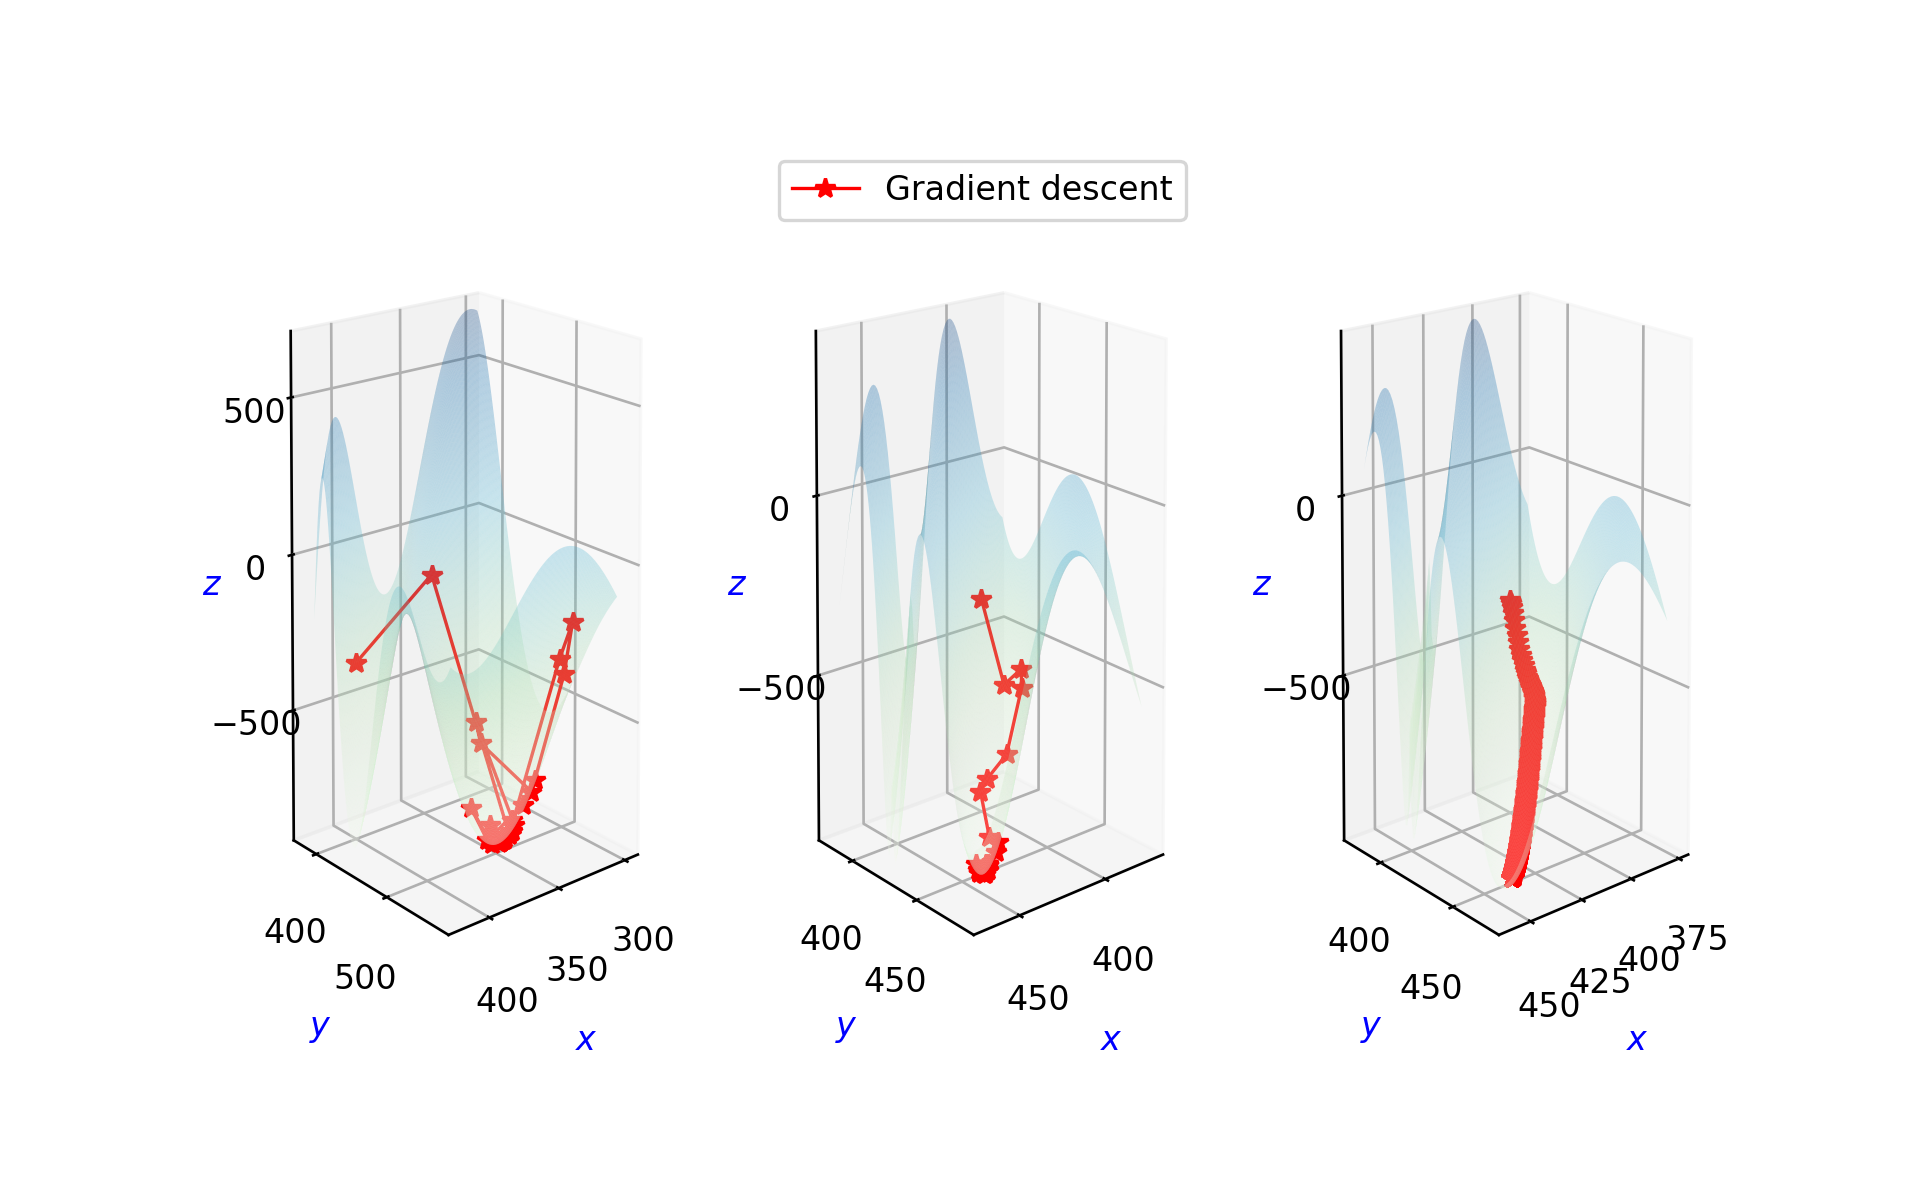

Momentum Converged in 115 steps. 
coordinates of x and y at (347.326772,499.415459) 
loss function of -888.9491252547152 
Step size is 1.5
Momentum Converged in 117 steps. 
coordinates of x and y at (439.480942,453.977419) 
loss function of -935.3379515589936 
Step size is 0.3
Momentum Converged in 999 steps. 
coordinates of x and y at (439.102005,453.612863) 
loss function of -935.3109610412369 
Step size is 0.005


In [10]:
############Put Function here for easy plotting#####
mom_plot_fuc = egg

eta1,eta2,eta3 = 1.5, 0.3, 0.005          #the learning rate for each plot below
setx,sety = 400.1,400.1             #initial value for x and y (must be float)
axiss = 20                          #change this for the meshgrid
alp = 0.8                        #alpha value
#################################################### 1st plot
#open figure
fig = plt.figure(figsize=(8,5), dpi=120)

xpath,ypath,loss_path = mom(fuc = mom_plot_fuc, x_init = setx, y_init = sety, n_iter = 2000, eta = eta1, tol = 1e-5, alpha = alp)#xxxxxx

xypath = np.vstack((xpath,ypath))

xmin, xmax, xstep = min(xpath), max(xpath), 1
ymin, ymax, ystep = min(ypath), max(ypath), 1

xrange = np.arange(xmin - axiss, xmax+axiss, xstep)
yrange = np.arange(ymin - axiss, ymax+axiss, ystep)

x, y = np.meshgrid(xrange,yrange)
loss_fuc = mom_plot_fuc(x,y)#xxxxxx

#Start plotting
ax = fig.add_subplot(1, 3, 1, projection='3d', elev=10, azim=50)
ax.plot_surface(x,y,loss_fuc,rstride=1, cstride=1, edgecolor='none', alpha=.3, cmap=plt.cm.GnBu)
ax.plot(xpath,ypath,loss_path, marker = '*', color = 'r', alpha = 1, label = 'Gradient descent',linewidth=1)

ax.set_xlabel('$x$', fontsize = 10,color = 'blue')
ax.set_ylabel('$y$', fontsize = 10,color = 'blue')
ax.set_zlabel('$z$', fontsize = 10,color = 'blue')

######################################################## 2nd plot
xpath,ypath,loss_path = mom(fuc = mom_plot_fuc, x_init = setx, y_init = sety, n_iter = 1000, eta = eta2, tol = 1e-5, alpha = alp)#xxxxxx

xypath = np.vstack((xpath,ypath))

xmin, xmax, xstep = min(xpath), max(xpath), 1
ymin, ymax, ystep = min(ypath), max(ypath), 1

xrange = np.arange(xmin - axiss, xmax+axiss, xstep)
yrange = np.arange(ymin - axiss, ymax+axiss, ystep)

x, y = np.meshgrid(xrange,yrange)
loss_fuc = mom_plot_fuc(x,y)#xxxxxx

#Start plotting
ax = fig.add_subplot(1, 3, 2, projection='3d', elev=10, azim=50)
ax.plot_surface(x,y,loss_fuc,rstride=1, cstride=1, edgecolor='none', alpha=.3, cmap=plt.cm.GnBu)
ax.plot(xpath,ypath,loss_path, marker = '*', color = 'r', alpha = 1, label = 'Gradient descent',linewidth=1)

plt.legend()
ax.set_xlabel('$x$', fontsize = 10,color = 'blue')
ax.set_ylabel('$y$', fontsize = 10,color = 'blue')
ax.set_zlabel('$z$', fontsize = 10,color = 'blue')

######################################################## 3rd plot
xpath,ypath,loss_path = mom(fuc = mom_plot_fuc, x_init = setx, y_init = sety, n_iter = 1000, eta = eta3, tol = 1e-5, alpha = alp)#xxxxxx

xypath = np.vstack((xpath,ypath))

xmin, xmax, xstep = min(xpath), max(xpath), 1
ymin, ymax, ystep = min(ypath), max(ypath), 1

xrange = np.arange(xmin - axiss, xmax+axiss, xstep)
yrange = np.arange(ymin - axiss, ymax+axiss, ystep)

x, y = np.meshgrid(xrange,yrange)
loss_fuc = mom_plot_fuc(x,y)#xxxxxx

#Start plotting
ax = fig.add_subplot(1, 3, 3, projection='3d', elev=10, azim=50)
ax.plot_surface(x,y,loss_fuc,rstride=1, cstride=1, edgecolor='none', alpha=.3, cmap=plt.cm.GnBu)
ax.plot(xpath,ypath,loss_path, marker = '*', color = 'r', alpha = 1, label = 'Gradient descent',linewidth=1)

ax.set_xlabel('$x$', fontsize = 10,color = 'blue')
ax.set_ylabel('$y$', fontsize = 10,color = 'blue')
ax.set_zlabel('$z$', fontsize = 10,color = 'blue')

plt.show()
plt.savefig('Momentum_GD.png')



## Adam

In [11]:
def adam(fuc, x_init, y_init, beta1, beta2, n_iter, eta, tol, eps = 1e-8):
    
    '''
    Adaptive Moment Estimation (Adam) computes adaptive learning rates for each parameter. Adam 
    stores exponentially decaying average of past squared gradients (v) and keeps an 
    exponentially decaying average of past gradients (m)
    
    Parameters
    ----------
    
    fn: Loss function with 2 variables
    
    x_init: Start point at coordinate x as float
    
    y_init: Start point at coordinate y as float
    
    beta1: Float. Decay rate for the first moment estimates (mean)(m). Default = 0.9
    
    beta2: Float. Decay rate for the second moment estimates (uncentered variance)(v). Default = 0.999
    
    n_iter: Number of iteration as interger
    
    eta: Learning Rate given as float, size of learning rate affects each correction/step taken in descent
    
    tol: Tolerance rate to end descent, by default should be set at a zero equivalent
    
    eps: Float constant. Used for numerical stability. Default = 10**-8
    
    
    Return
    ------
    
    x_path: Path of x taken to map the route of gradient descent.  
    y_path: Path of y taken to map the route of gradient descent. 
    loss_path: loss function for each x and y path. 
    
    
    '''
    x = x_init
    y = y_init
    loss = fuc(x,y)

    loss_path = []
    x_path = []
    y_path = []

    x_path.append(x)
    y_path.append(y)
    loss_path.append(loss)

    dx,dy = PDA(fuc,x,y)

    m_x = 0
    m_y = 0
    v_x = 0
    v_y = 0

    learn = eta * (np.sqrt(1 - beta2))/(1 - beta1)

    for i in range(n_iter):
        if np.abs(dx) < tol or np.isnan(dx) or np.abs(dy) < tol or np.isnan(dy):
            break
        dx,dy = PDA(fuc,x,y)

        m_x = beta1 * m_x + dx * (1 - beta1)
        m_y = beta1 * m_y + dy * (1 - beta1)

        v_x = beta2 * v_x + dx * dx * (1 - beta2)
        v_y = beta2 * v_y + dy * dy * (1 - beta2)


        x += - (learn * m_x)/(np.sqrt(v_x) + eps)
        y += - (learn * m_y)/(np.sqrt(v_y) + eps)

        x_path.append(x)
        y_path.append(y)

        loss = fuc(x, y)
        loss_path.append(loss)

    if np.isnan(dx) or np.isnan(dy):
        print('\033[1mAdam \033[0mExploded')
    elif np.abs(dx) < tol and np.abs(dy) < tol :
        print('\033[1mAdam \033[0mConverged in {} steps. \ncoordinates of x and y at ({:f},{:f}) \nloss function of {} \nStep size is {}'.format(i,x,y,loss,eta))
    else:
        print('\033[1mAdam \033[0mConverged in {} steps. \ncoordinates of x and y at ({:f},{:f}) \nloss function of {} \nStep size is {}'.format(i,x,y,loss,eta))

    return x_path, y_path, loss_path  

## Get Ready to plot Adam


<IPython.core.display.Javascript object>


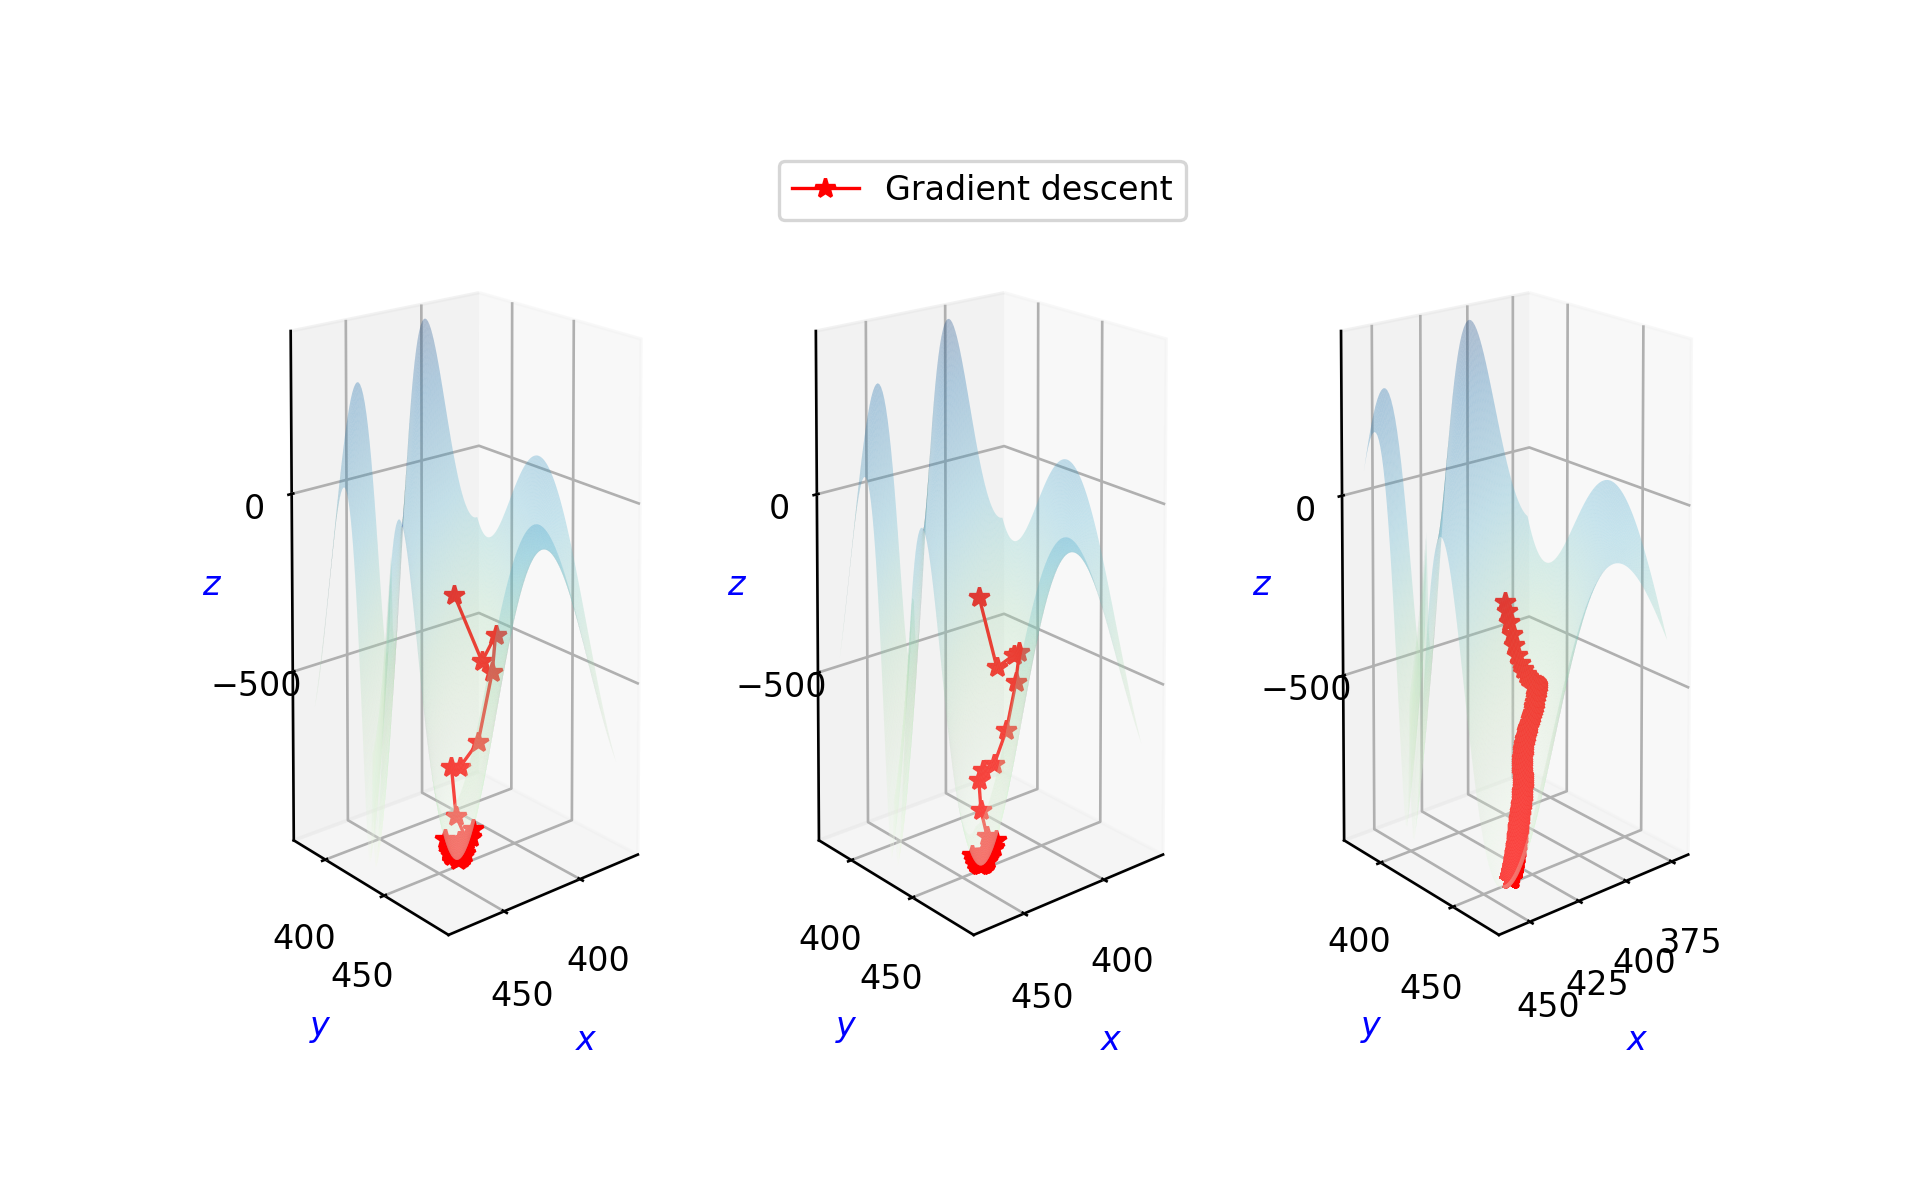

Adam Converged in 216 steps. 
coordinates of x and y at (439.481168,453.977718) 
loss function of -935.3379515371922 
Step size is 10.5
Adam Converged in 236 steps. 
coordinates of x and y at (439.481181,453.977596) 
loss function of -935.3379515545057 
Step size is 6.5
Adam Converged in 773 steps. 
coordinates of x and y at (439.480940,453.977379) 
loss function of -935.3379515599606 
Step size is 0.5


In [12]:
############Put Function here for easy plotting#####
adam_plot_fuc = egg

eta1,eta2,eta3 = 10.5, 6.5,0.5          #the learning rate for each plot below
setx,sety = 400.1,400.1          #initial value for x and y (must be float)
axiss = 20                          #change this for the meshgrid
bet1 = 0.9                        #beta1 value
bet2 = 0.999                   #beta2 value
#################################################### 1st plot

#open figure
fig = plt.figure(figsize=(8,5), dpi=120)

xpath,ypath,loss_path = adam(fuc = adam_plot_fuc, x_init = setx, y_init = sety, 
                             beta1 = bet1, beta2 = bet2, n_iter = 1000, 
                             eta = eta1, tol = 1e-5)

xypath = np.vstack((xpath,ypath))

xmin, xmax, xstep = min(xpath), max(xpath), 1
ymin, ymax, ystep = min(ypath), max(ypath), 1

xrange = np.arange(xmin - axiss, xmax+axiss, xstep)
yrange = np.arange(ymin - axiss, ymax+axiss, ystep)

x, y = np.meshgrid(xrange,yrange)
loss_fuc = adam_plot_fuc(x,y)

#Start plotting
ax = fig.add_subplot(1, 3, 1, projection='3d', elev=10, azim=50)
ax.plot_surface(x,y,loss_fuc,rstride=1, cstride=1, edgecolor='none', alpha=.3, cmap=plt.cm.GnBu)
ax.plot(xpath,ypath,loss_path, marker = '*', color = 'r', alpha = 1, label = 'Gradient descent',linewidth=1)

ax.set_xlabel('$x$', fontsize = 10,color = 'blue')
ax.set_ylabel('$y$', fontsize = 10,color = 'blue')
ax.set_zlabel('$z$', fontsize = 10,color = 'blue')

#################################################### 2nd plot
xpath,ypath,loss_path = adam(fuc = adam_plot_fuc, x_init = setx, y_init = sety, 
                             beta1 = bet1, beta2 = bet2, n_iter = 1000, 
                             eta = eta2, tol = 1e-5)

xypath = np.vstack((xpath,ypath))

xmin, xmax, xstep = min(xpath), max(xpath), 1
ymin, ymax, ystep = min(ypath), max(ypath), 1

xrange = np.arange(xmin - axiss, xmax+axiss, xstep)
yrange = np.arange(ymin - axiss, ymax+axiss, ystep)

x, y = np.meshgrid(xrange,yrange)
loss_fuc = adam_plot_fuc(x,y)#xxxxxx

#Start plotting
ax = fig.add_subplot(1, 3, 2, projection='3d', elev=10, azim=50)
ax.plot_surface(x,y,loss_fuc,rstride=1, cstride=1, edgecolor='none', alpha=.3, cmap=plt.cm.GnBu)
ax.plot(xpath,ypath,loss_path, marker = '*', color = 'r', alpha = 1, label = 'Gradient descent',linewidth=1)

plt.legend()
ax.set_xlabel('$x$', fontsize = 10,color = 'blue')
ax.set_ylabel('$y$', fontsize = 10,color = 'blue')
ax.set_zlabel('$z$', fontsize = 10,color = 'blue')

#################################################### 3rd plot
xpath,ypath,loss_path = adam(fuc = adam_plot_fuc, x_init = setx, y_init = sety, 
                             beta1 = bet1, beta2 = bet2, n_iter = 1000, 
                             eta = eta3, tol = 1e-5)

xypath = np.vstack((xpath,ypath))

xmin, xmax, xstep = min(xpath), max(xpath), 1
ymin, ymax, ystep = min(ypath), max(ypath), 1

xrange = np.arange(xmin - axiss, xmax+axiss, xstep)
yrange = np.arange(ymin - axiss, ymax+axiss, ystep)

x, y = np.meshgrid(xrange,yrange)
loss_fuc = adam_plot_fuc(x,y)#xxxxxx

#Start plotting
ax = fig.add_subplot(1, 3, 3, projection='3d', elev=10, azim=50)
ax.plot_surface(x,y,loss_fuc,rstride=1, cstride=1, edgecolor='none', alpha=.3, cmap=plt.cm.GnBu)
ax.plot(xpath,ypath,loss_path, marker = '*', color = 'r', alpha = 1, label = 'Gradient descent',linewidth=1)

ax.set_xlabel('$x$', fontsize = 10,color = 'blue')
ax.set_ylabel('$y$', fontsize = 10,color = 'blue')
ax.set_zlabel('$z$', fontsize = 10,color = 'blue')

plt.show()
plt.savefig('Adam_GD.png')

# Plot Plain Vanilla, Momntum, and Adam together

Adam Converged in 499 steps. 
coordinates of x and y at (439.285702,453.785851) 
loss function of -935.3306350876046 
Step size is 0.4
Momentum Converged in 106 steps. 
coordinates of x and y at (439.481405,453.977689) 
loss function of -935.337951521276 
Step size is 0.4
Plain Vanilla Converged in 172 steps. 
coordinates of x and y at (439.480950,453.977390) 
loss function of -935.3379515601692 
Step size is 0.4


<IPython.core.display.Javascript object>


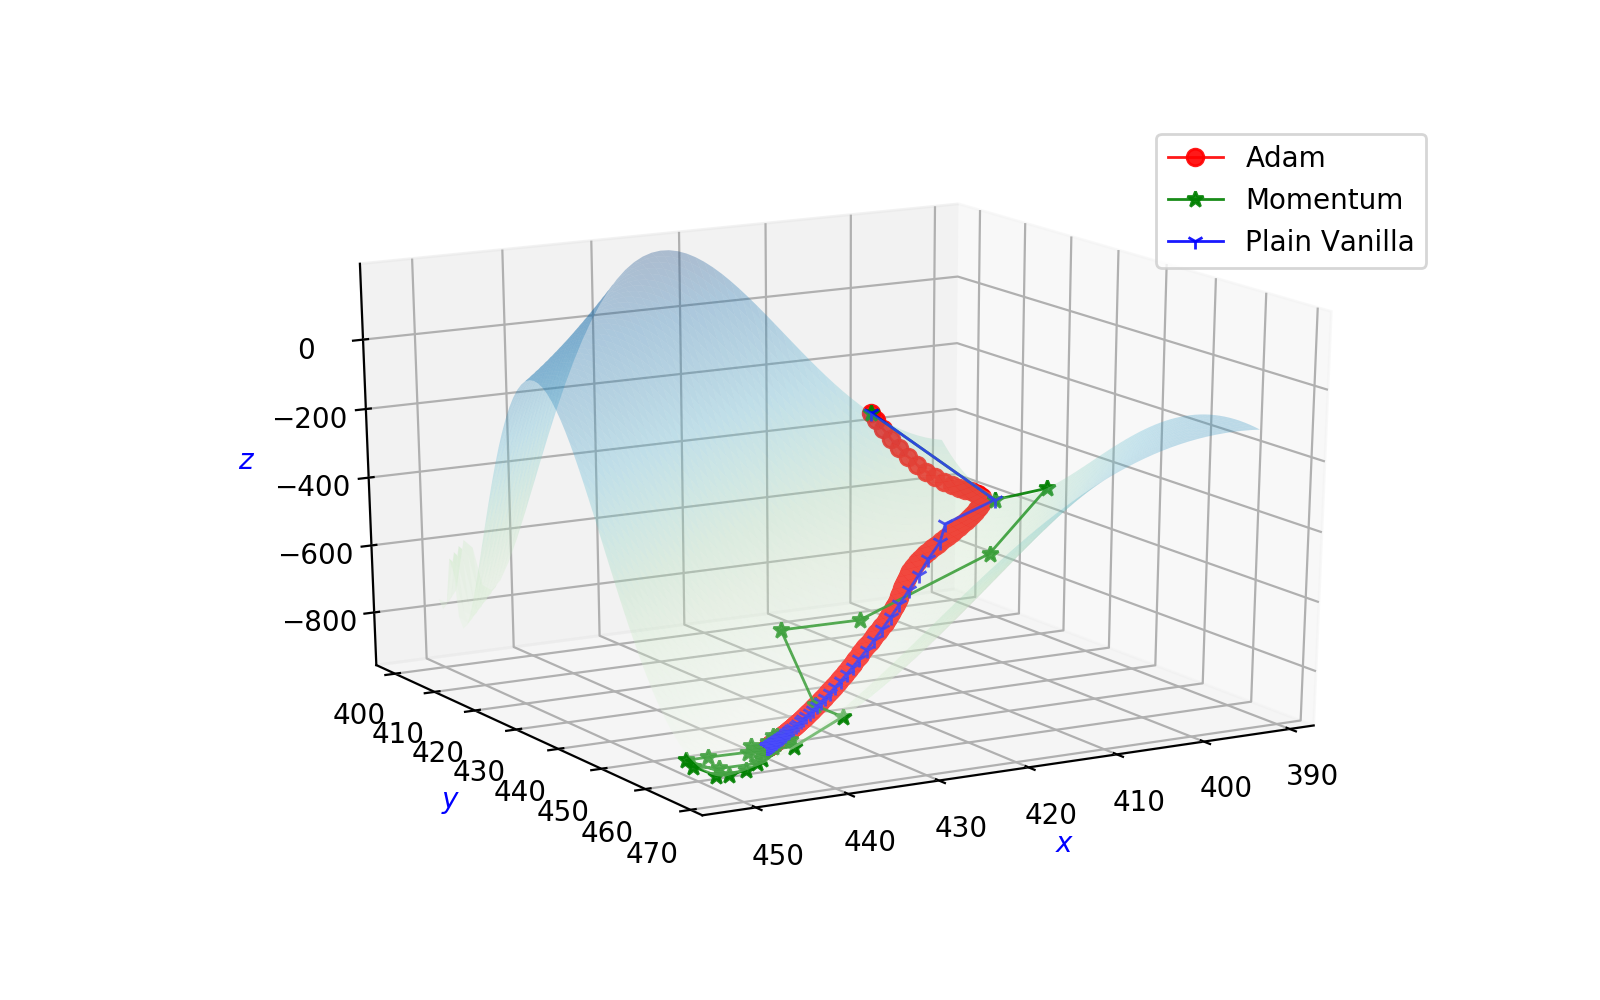

In [13]:
############Put Function here for easy plotting#####
plot_fuc = egg

eta2 = 0.4                   #the learning rate for each plot below
setx,sety = 400.1,400.1       #initial value for x and y (must be float)
axiss = 0                        #change this for the meshgrid
bet1 = 0.9                        #beta1 value
bet2 = 0.999                   #beta2 value
alp = 0.8
steps = 500
####################################################plot
################# Adam Path
xpath,ypath,loss_path = adam(fuc = plot_fuc, x_init = setx, y_init = sety, 
                             beta1 = bet1, beta2 = bet2, n_iter = steps, 
                             eta = eta2, tol = 1e-5)

xypath = np.vstack((xpath,ypath))


################# Momntum Path
xpath2,ypath2,loss_path2 = mom(fuc = plot_fuc, x_init = setx, y_init = sety, 
                            n_iter = steps, eta = eta2, tol = 1e-5, alpha = alp)
xypath2 = np.vstack((xpath2,ypath2))


################# Plain Vanilla Path

xpath3,ypath3,loss_path3 = PlainV(fuc = plot_fuc, x_init = setx, y_init = sety, 
                               n_iter = steps, eta = eta2, tol = 1e-5)

xypath3 = np.vstack((xpath3,ypath3))


#open figure
fig = plt.figure(figsize=(8,5), dpi=100)

xmin, xmax, xstep = min(min(xpath),min(xpath2),min(xpath3)),max(max(xpath),max(xpath2),max(xpath3)), 1
ymin, ymax, ystep = min(min(ypath),min(ypath2),min(ypath3)), max(max(ypath),max(ypath2),max(ypath3)), 1

xrange = np.arange(xmin - axiss, xmax+axiss, xstep)
yrange = np.arange(ymin - axiss, ymax+axiss, ystep)

x, y = np.meshgrid(xrange,yrange)

loss_fuc = plot_fuc(x,y)

ax = fig.add_subplot(1, 1, 1, projection='3d', elev=20, azim=60)
ax.plot_surface(x,y,loss_fuc,rstride=1, cstride=1, edgecolor='none', alpha=.3, cmap=plt.cm.GnBu)


ax.plot(xpath,ypath,loss_path, marker = 'o', color = 'r', alpha = 0.9, label = 'Adam',linewidth=1)
plt.legend()

ax.plot(xpath2,ypath2,loss_path2, marker = '*', color = 'g', alpha = 0.9, label = 'Momentum',linewidth=1)
plt.legend()

ax.plot(xpath3,ypath3,loss_path3, marker = '1', color = 'b', alpha = 0.9, label = 'Plain Vanilla',linewidth=1)
plt.legend()

ax.set_xlabel('$x$', fontsize = 10,color = 'blue')
ax.set_ylabel('$y$', fontsize = 10,color = 'blue')
ax.set_zlabel('$z$', fontsize = 10,color = 'blue')
plt.show()
plt.savefig('3_in_1_GD.png')

# Path Table

In [14]:
adam = pd.DataFrame(xypath)
adam.rename(index = {0: "Adam", 
                     1:"Adam"}, inplace = True) 

Momentum = pd.DataFrame(xypath2)
Momentum.rename(index = {0: "Momentum", 
                     1:"Momentum"}, inplace = True) 

PV = pd.DataFrame(xypath3)
PV.rename(index = {0: "Plain_Vanilla", 
                     1:"Plain_Vanilla"}, inplace = True) 

In [15]:
frames = [adam, Momentum, PV]
result = pd.concat(frames)

In [16]:
result

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
Adam,400.1,399.700000,399.163634,398.542287,397.866470,397.159257,396.440775,395.730240,395.046844,394.409806,...,439.261623,439.264432,439.267207,439.269948,439.272655,439.275329,439.277971,439.280580,439.283156,439.285702
Adam,400.1,400.500000,401.036940,401.660743,402.343179,403.064718,403.810323,404.567634,405.326088,406.076499,...,453.762230,453.764986,453.767708,453.770397,453.773053,453.775676,453.778267,453.780826,453.783354,453.785851
Momentum,400.1,392.181172,391.537725,400.232347,415.066100,426.205051,428.692144,431.250500,438.606920,447.761264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Momentum,400.1,413.383177,423.632501,427.323261,426.655123,430.661847,443.196107,454.334129,458.274152,457.730267,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plain_Vanilla,400.1,392.181172,397.872788,400.099734,402.742591,405.153345,407.491087,409.705984,411.807147,413.789747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plain_Vanilla,400.1,413.383177,413.005959,416.002491,418.389351,420.805792,423.075143,425.238645,427.281559,429.207271,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# GD Animation

#### Reference: http://louistiao.me/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/

In [17]:
class TrajectoryAnimation3D(animation.FuncAnimation):
    
    def __init__(self, *paths, zpaths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths
        self.zpaths = zpaths
        
        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]

        super(TrajectoryAnimation3D, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line in self.lines:
            line.set_data([], [])
            line.set_3d_properties([])
        return self.lines

    def animate(self, i):
        for line, path, zpath in zip(self.lines, self.paths, self.zpaths):
            line.set_data(*path[::,:i])
            line.set_3d_properties(zpath[:i])
        return self.lines

In [18]:
methods = [
    "Plain_Vanilla",
    "Momentum",
    "Adam"
]

# Draw path and loss path from individual methods
paths = [np.array(result.loc[method]) for method in methods]

zpaths = [plot_fuc(*path) for path in paths]

<IPython.core.display.Javascript object>


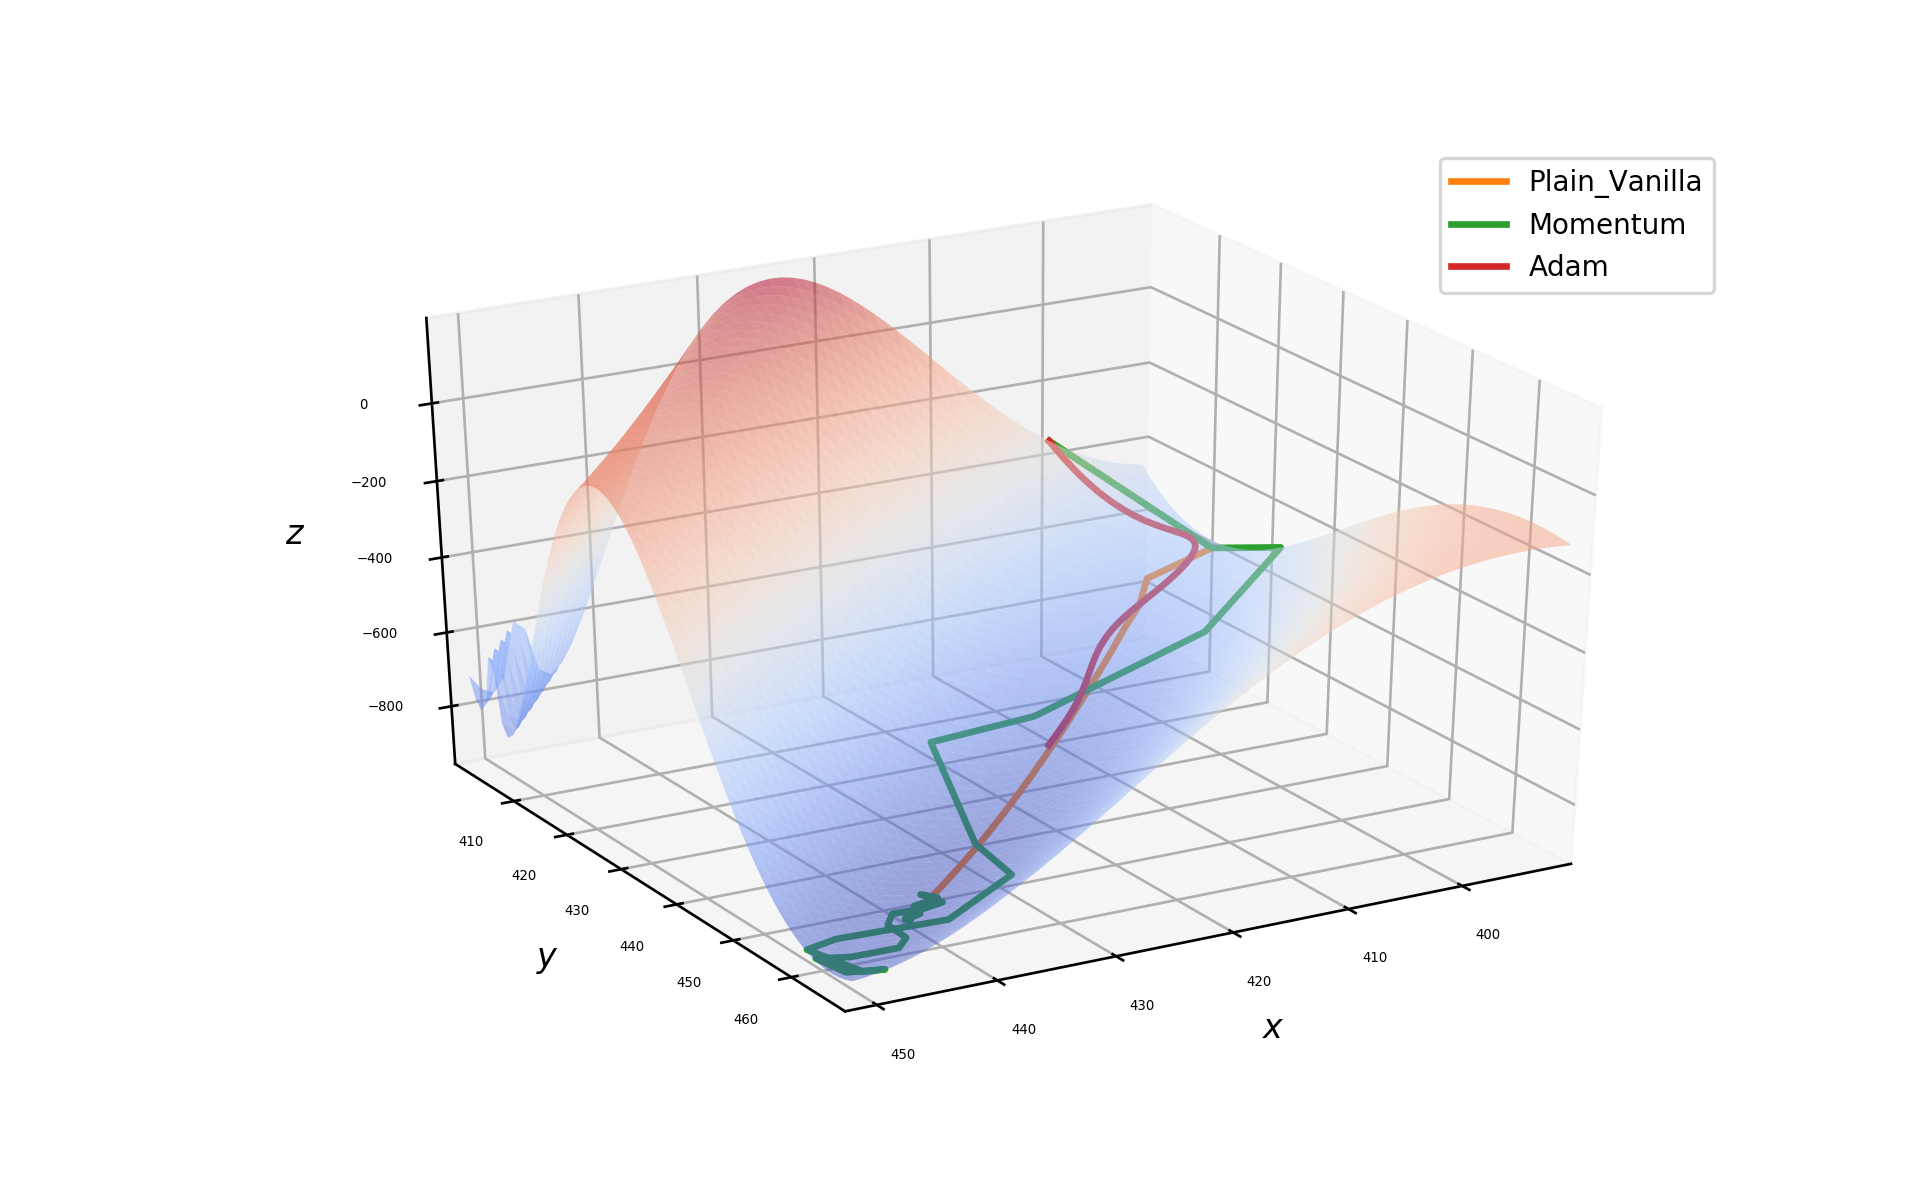

In [19]:
# Set Parameters and return array of x,y,z
xmin, xmax, xstep = min(min(xpath),min(xpath2),min(xpath3)),max(max(xpath),max(xpath2),max(xpath3)), 1
ymin, ymax, ystep = min(min(ypath),min(ypath2),min(ypath3)), max(max(ypath),max(ypath2),max(ypath3)), 1

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

z = plot_fuc(x, y)


# Plot figure
fig = plt.figure(figsize=(8, 5), dpi = 120)
ax = plt.axes(projection='3d', elev=30, azim=60)

ax.plot_surface(x, y, z, rstride=1, cstride=1, 
                edgecolor='none', alpha=.5, cmap=plt.cm.coolwarm)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.xaxis.set_tick_params(labelsize=4)
ax.yaxis.set_tick_params(labelsize=4)
ax.zaxis.set_tick_params(labelsize=4)

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

anim = TrajectoryAnimation3D(*paths, zpaths=zpaths, labels=methods, ax=ax)

ax.legend(loc='upper right', fontsize = 'small')